In [2]:
%load_ext autoreload
%autoreload 2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from PrepareData import prepare_dataset
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import sys
sys.path.insert(0, '../seal_wrapper/')
from seal_wrapper import EA

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Prepare dataset

In [3]:
X_train, X_val, X_test, y_train, y_val, y_test = prepare_dataset()
y_scaler = StandardScaler()
y_train = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_val = y_scaler.transform(y_val.values.reshape(-1, 1))

/home/simon/Dissertation/Abalone/PrepareData.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  X_test[['length', 'diameter', 'height', 'whole_weight', 'shucked_weight', 'viscera_weight', 'shell_weight']])
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/home/simon/miniconda3/envs/diss/lib/python3.6/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardSc

In [4]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(3383, 10) (3383, 1)
(376, 10) (376, 1)
(418, 10) (418,)


In [5]:
def plot_predictions(pred, y, save_as=None):
    fig = plt.figure(figsize=(6, 6))
    ax = plt.subplot(111)
    ax.scatter(pred, y, alpha=0.2)
    ax.set_xlabel('predicted')
    ax.set_ylabel('true')
    ax.plot(np.arange(0, 30, 0.1), np.arange(0, 30, 0.1))
    if save_as != None:
        plt.savefig(save_as)

In [6]:
def msse(pred, y):
    return np.sum((y-pred)**2) / y.shape[0]

In [7]:
def normalize_weights(w, var, gamma):
    return w * gamma / np.sqrt(var + 0.0001)

In [8]:
def normalize_bias(b, mean, var, beta, gamma):
    return (b - mean) * (gamma / np.sqrt(var + 0.0001)) + beta

In [9]:
X_test_enc = EA(X_test.values, True)

## Relu

In [10]:
def relu(z):
    return np.maximum(z, 0)

In [11]:
relu_weights = np.load('../weights/abalone/abalone_scale.npy')

In [12]:
#w1, b1, gamma, beta, mean, var, w2, b2 = relu_weights

In [13]:
w1, b1, w2, b2 = relu_weights

In [13]:
# w_norm = normalize_weights(w1, var**2, gamma)
# b_norm = normalize_bias(b1, mean, var**2, beta, gamma).reshape(1, -1)

In [14]:
# layer1 = X_test_enc.dot(EA(w_norm)) + EA(b_norm.reshape(1, -1))
# layer1_relu = layer1.relu()
# pred_relu = layer1_relu.dot(EA(w2)) + EA(b2.reshape(1, -1))

In [17]:
layer1 = X_test_enc.dot(EA(w1)) + EA(b1.reshape(1, -1))

(array([  2.,   0.,   2.,   3.,   4.,   3.,   9.,  10.,  11.,   7.,  16.,
         15.,  18.,  18.,  24.,  26.,  22.,  34.,  52.,  89., 184., 139.,
        104., 105.,  88.,  53.,  38.,  28.,  22.,  22.,  14.,  27.,  18.,
          9.,   8.,   6.,   4.,   6.,   2.,   4.,   3.,   1.,   0.,   2.,
          1.,   0.,   0.,   0.,   0.,   1.]),
 array([-2.07474084, -1.97143997, -1.8681391 , -1.76483823, -1.66153737,
        -1.5582365 , -1.45493563, -1.35163476, -1.2483339 , -1.14503303,
        -1.04173216, -0.9384313 , -0.83513043, -0.73182956, -0.62852869,
        -0.52522783, -0.42192696, -0.31862609, -0.21532522, -0.11202436,
        -0.00872349,  0.09457738,  0.19787825,  0.30117911,  0.40447998,
         0.50778085,  0.61108171,  0.71438258,  0.81768345,  0.92098432,
         1.02428518,  1.12758605,  1.23088692,  1.33418779,  1.43748865,
         1.54078952,  1.64409039,  1.74739126,  1.85069212,  1.95399299,
         2.05729386,  2.16059473,  2.26389559,  2.36719646,  2.47049733,
 

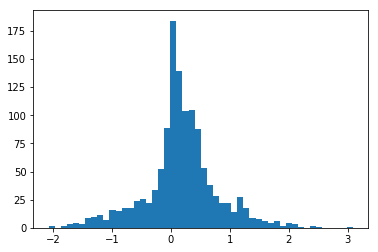

In [19]:
layer = layer1.values().flatten()
plt.hist(layer, bins=50)

In [ ]:
layer1_relu = layer1.relu()
pred_relu = layer1_relu.dot(EA(w2)) + EA(b2.reshape(1, -1))

In [16]:
layer1_clear = X_test.values.dot(w1) + b1
print(layer1_clear.mean(axis=0), layer1_clear.std(axis=0), layer1_clear.max(), layer1_clear.min())
layer1_relu_clear = relu(layer1_clear)
pred_relu_clear = layer1_relu_clear.dot(w2) + b2

[0.06529055 0.97552659] [0.22328758 0.35462356] 1.8461759211554782 -0.8194880085497782


In [17]:
pred_relu = y_scaler.inverse_transform(pred_relu.values().flatten())
pred_relu_clear = y_scaler.inverse_transform(pred_relu_clear.flatten())

In [18]:
msse_relu_enc = msse(pred_relu, y_test)
print('MSSE relu enc: {}'.format(msse_relu_enc))

MSSE relu enc: 6.258569503665151


In [19]:
msse_relu_clear = msse(pred_relu_clear, y_test)
print('MSSE relu clear: {}'.format(msse_relu_clear))

MSSE relu clear: 4.4122892809742424


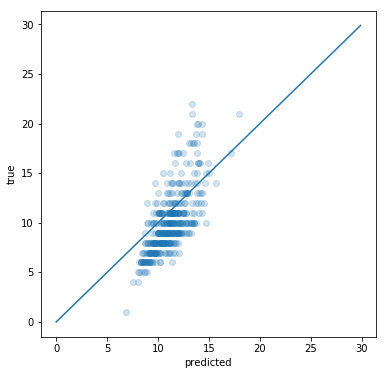

In [20]:
plot_predictions(pred_relu, y_test)

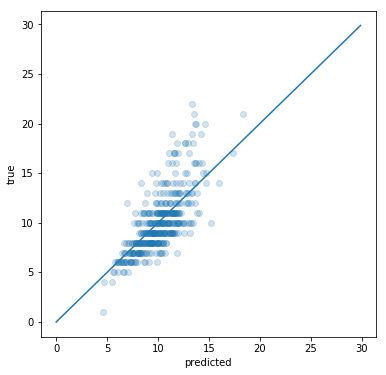

In [21]:
plot_predictions(pred_relu_clear.flatten(), y_test)